In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix, state_fidelity 
import numpy as np
from qiskit_aer import AerSimulator

### a graph state ∣G⟩ is associated with a graph, G=(V,E), where the vertices (v∈V) represent qubits initialised into the ∣+⟩=(∣0⟩+∣1⟩)/sqrt(2) state, and edges (e∈E) represent the application of controlled-phase (CZ) gates between respective vertices. An important special case is the two-qubit graph state, which is locally equivalent to a maximally-entangled Bell pair. So the state distribuition protocol using DIQT will be same as bell for 2 qubit

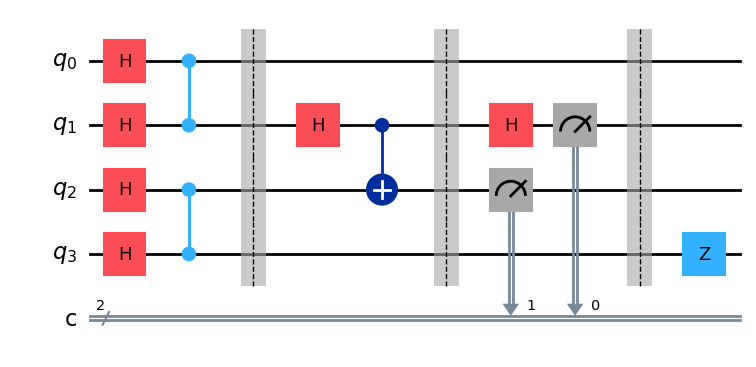

In [21]:
qc = QuantumCircuit(4,2)
#creating 2qubit graph states
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.cz(0,1)
qc.cz(2,3)
qc.barrier()
#Performing Quantum walk
qc.h(1)
qc.cx(1,2)
qc.barrier()
#Measurement
qc.h(1)
qc.measure(1,0)
qc.measure(2,1)
qc.barrier()
#Local recovery operation
qc.z(3)
qc.draw('mpl')

In [22]:
qc.save_statevector(label="psi")

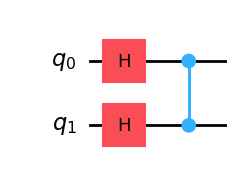

In [27]:
_2qgraph = QuantumCircuit(2)
_2qgraph.h(0)
_2qgraph.h(1)
_2qgraph.cz(0,1)
_2qgraph.draw('mpl')

In [28]:
twoQubitGraph = Statevector.from_instruction(_2qgraph)

In [23]:
sim = AerSimulator(
    method="statevector")

In [29]:
result = sim.run(qc).result()
psi = result.data(0)["psi"]

rho_end = partial_trace(DensityMatrix(psi), [1,2])

In [30]:
print(state_fidelity(rho_end, twoQubitGraph))

0.9999999999999996


In [31]:
import numpy as np
from qiskit.quantum_info import Pauli, Operator
# Define stabilizers on 2 qubits 
K1 = Pauli("XX")    
K2 = Pauli("ZZ")   
K3 = Pauli("XZ")    
K4 = Pauli("ZX")


def expval(rho, pauli):
    P1 = Operator(pauli).data
    return np.real(np.trace(rho @ P1))

print("<K0> =", expval(rho_end, K1))
print("<K4> =", expval(rho_end, K2))
print("<K4> =", expval(rho_end, K3))
print("<K4> =", expval(rho_end, K4))

<K0> = 0.0
<K4> = 0.0
<K4> = 1.0
<K4> = 1.0


### 2 qubit graph state has been distributed successfully. Now it's time for 3 qubit

#### Distribution of 3 qubit graph state amongg three parties using three two qubit graph states

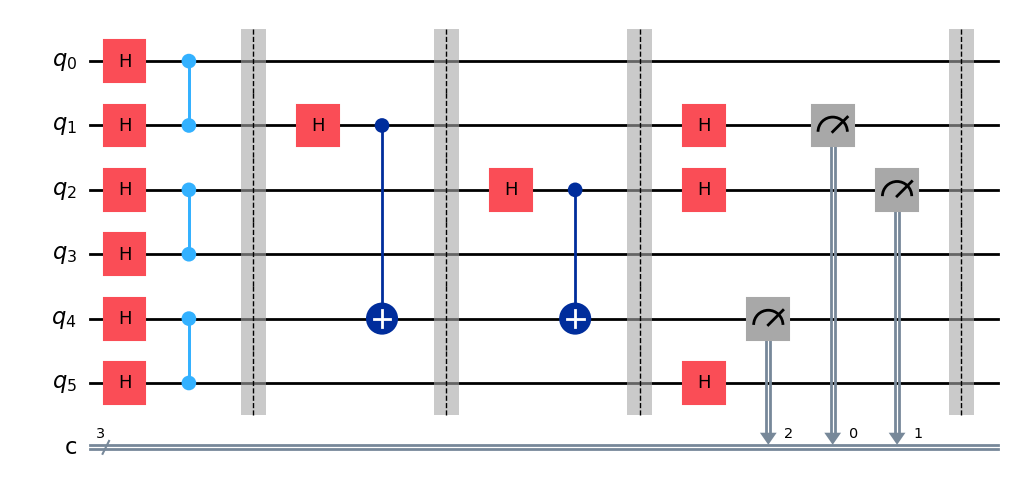

In [62]:
qc1 = QuantumCircuit(6,3)
#creating 3qubit graph states
qc1.h(0)
qc1.h(1)
qc1.h(2)
qc1.h(3)
qc1.h(4)
qc1.h(5)
qc1.cz(0,1)
qc1.cz(2,3)
qc1.cz(4,5)
qc1.barrier()
#Performing Quantum walk
qc1.h(1)
qc1.cx(1,4)
qc1.barrier()
qc1.h(2)
qc1.cx(2,4)
qc1.barrier()
#Measurement
qc1.h(1)
qc1.h(2)
qc1.h(5)
qc1.measure(1,0)
qc1.measure(2,1)
qc1.measure(4,2)
qc1.barrier()

#qc1
qc1.draw('mpl')

In [63]:
qc_unitary = QuantumCircuit(qc1.num_qubits)

for inst, qargs, cargs in qc1.data:
    if inst.name != "measure":
        qc_unitary.append(inst, qargs)

psi1 = Statevector.from_instruction(qc_unitary)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_15596\4051327713.py:3: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for inst, qargs, cargs in qc1.data:


In [65]:
rho1 = DensityMatrix(psi1)

# projector |00><00| on qubits q1,q2
proj_000 = DensityMatrix.from_label('000').to_operator()
H = Operator.from_label('H')
rho_post1 = rho1.evolve(proj_000, qargs=[1,2,4])
rho_post1 = rho_post1.evolve(H, qargs=[3])
rho_post1 = rho_post1 / np.trace(rho_post1.data)

In [66]:
rho_end1 = partial_trace(rho_post1, [1,2,4])

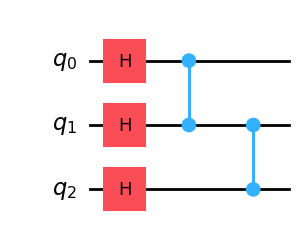

In [51]:
_3qgraph = QuantumCircuit(3)
_3qgraph.h(0)
_3qgraph.h(1)
_3qgraph.h(2)
_3qgraph.cz(0,1)
_3qgraph.cz(1,2)

_3qgraph.draw('mpl')

In [67]:
threeQubitGraph = Statevector.from_instruction(_3qgraph)

In [68]:
print(state_fidelity(rho_end1, threeQubitGraph))

0.9999999999999993


In [69]:
print(psi1)

Statevector([ 1.76776695e-01+0.j, -6.97393972e-19+0.j,  1.76776695e-01+0.j,
              6.97393972e-19+0.j,  1.76776695e-01+0.j, -6.97393972e-19+0.j,
              1.76776695e-01+0.j,  6.97393972e-19+0.j, -6.97393972e-19+0.j,
              1.76776695e-01+0.j, -6.97393972e-19+0.j, -1.76776695e-01+0.j,
              6.97393972e-19+0.j, -1.76776695e-01+0.j,  6.97393972e-19+0.j,
              1.76776695e-01+0.j, -6.97393972e-19+0.j,  1.76776695e-01+0.j,
             -6.97393972e-19+0.j, -1.76776695e-01+0.j, -6.97393972e-19+0.j,
              1.76776695e-01+0.j, -6.97393972e-19+0.j, -1.76776695e-01+0.j,
              1.76776695e-01+0.j, -6.97393972e-19+0.j,  1.76776695e-01+0.j,
              6.97393972e-19+0.j, -1.76776695e-01+0.j,  6.97393972e-19+0.j,
             -1.76776695e-01+0.j, -6.97393972e-19+0.j, -6.97393972e-19+0.j,
              1.76776695e-01+0.j, -6.97393972e-19+0.j, -1.76776695e-01+0.j,
             -6.97393972e-19+0.j,  1.76776695e-01+0.j, -6.97393972e-19+0.j,
            

In [70]:
print(threeQubitGraph)

Statevector([ 0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
             -0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
             -0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))


In [71]:


# Define stabilizers on 3 qubits (ordering: q0, q4, q5)
K0 = Pauli("IZX")   # X0 Z4
K4 = Pauli("ZXZ")   # Z5 X4 Z0
K5 = Pauli("XZI")   # Z4 X5

def expval(rho, pauli):
    P = Operator(pauli).data
    return np.real(np.trace(rho @ P))

print("<K0> =", expval(rho_end1, K0))
print("<K4> =", expval(rho_end1, K4))
print("<K5> =", expval(rho_end1, K5))


<K0> = 1.0
<K4> = 1.0
<K5> = 1.0
